In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mydata = pd.read_csv("/content/sms_spam.csv")

In [ ]:
mydata.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
mydata.tail()

,type,text
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [ ]:
mydata.sample(2)

,type,text
2960,ham,I am late. I will be there at
2095,ham,U wake up already? Wat u doing? U picking us u...


In [ ]:
mydata.shape

(5559, 2)

Data Cleaning

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [ ]:
mydata.rename(columns={'type':'target'},inplace=True)
mydata.head()

,target,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
mydata['target'] = encoder.fit_transform(mydata['target'])

In [ ]:
mydata.head()

,target,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [ ]:
#missing values
mydata.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
mydata.duplicated().sum()

403

In [ ]:
mydata = mydata.drop_duplicates(keep='first')

In [ ]:
mydata.duplicated().sum()

0

In [ ]:
mydata.shape

(5156, 2)

Exploratory Data Analysis(EDA)

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5156 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5156 non-null   int64 
 1   text    5156 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.8+ KB


In [ ]:
mydata.head()

,target,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [ ]:
mydata['target'].value_counts() #0 - ham , 1 - spam

target
0    4503
1     653
Name: count, dtype: int64

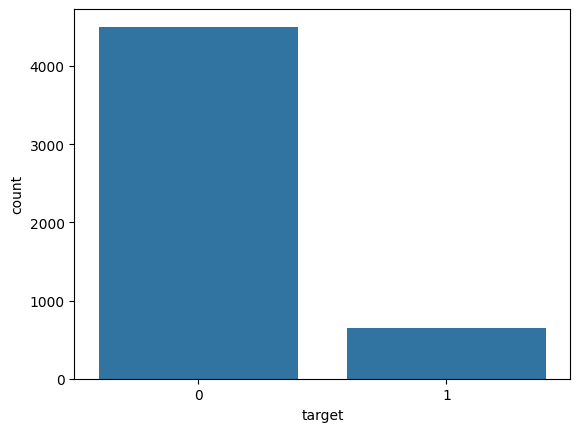

In [ ]:
countplt=sns.countplot(x='target', data=mydata) #0 - ham , 1 - spam
plt.show()

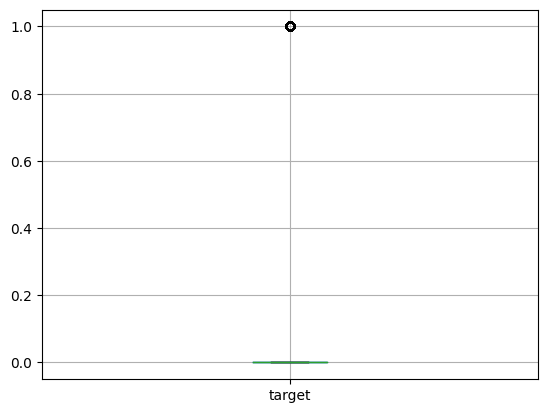

In [ ]:
mydata[['target']].boxplot()
plt.show()

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
mydata['characters'] = mydata['text'].apply(len)

In [ ]:
mydata.head()

,target,text,characters
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,1,okmail: Dear Dave this is your final notice to...,161


In [ ]:
mydata['words'] = mydata['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
mydata.head()

,target,text,characters,words
0,0,Hope you are having a good week. Just checking in,49,11
1,0,K..give back my thanks.,23,7
2,0,Am also doing in cbe only. But have to pay.,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23
4,1,okmail: Dear Dave this is your final notice to...,161,32


In [ ]:
mydata['sentences'] = mydata['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
mydata.head()

,target,text,characters,words,sentences
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3


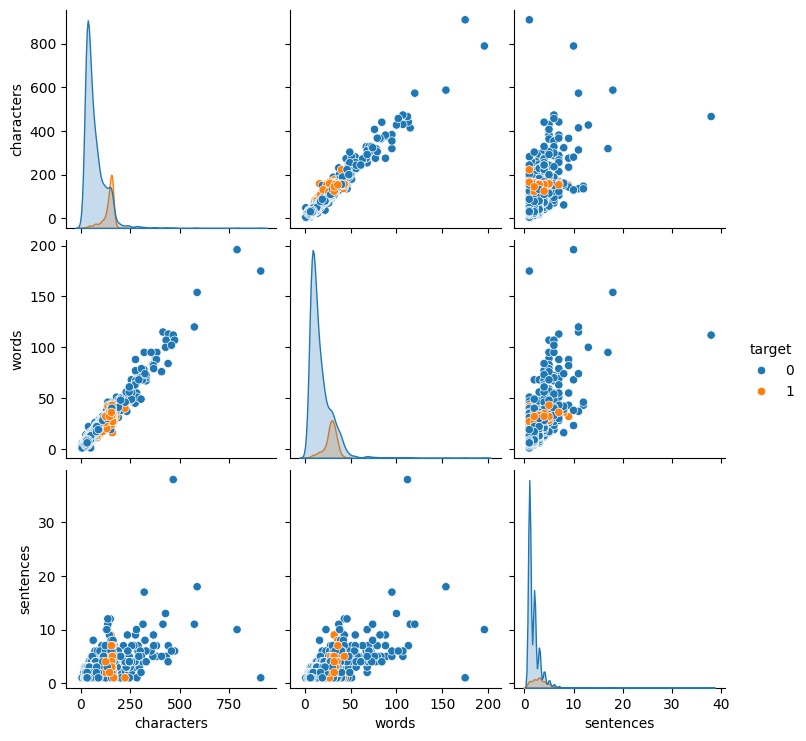

In [ ]:
sns.pairplot(mydata,hue='target')

Data Preprocessing

In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
# Defining a function to clean up the text
def Clean(text):
    sms = re.sub('[^a-zA-Z]', ' ', text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

mydata["Clean_text"] = mydata["text"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*mydata["Clean_text"][:5], sep = "\n")

 The First 5 Texts after cleaning:
hope you are having a good week just checking in
k give back my thanks
am also doing in cbe only but have to pay
complimentary star ibiza holiday or cash needs your urgent collection now from landline not to lose out box sk wp ppm
okmail dear dave this is your final notice to collect your tenerife holiday or cash award call from landline tcs sae box cw wx ppm


In [ ]:
mydata["Tokenize_text"]=mydata.apply(lambda row: nltk.word_tokenize(row["Clean_text"]), axis=1)


In [ ]:
print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*mydata["Tokenize_text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['hope', 'you', 'are', 'having', 'a', 'good', 'week', 'just', 'checking', 'in']
['k', 'give', 'back', 'my', 'thanks']
['am', 'also', 'doing', 'in', 'cbe', 'only', 'but', 'have', 'to', 'pay']
['complimentary', 'star', 'ibiza', 'holiday', 'or', 'cash', 'needs', 'your', 'urgent', 'collection', 'now', 'from', 'landline', 'not', 'to', 'lose', 'out', 'box', 'sk', 'wp', 'ppm']
['okmail', 'dear', 'dave', 'this', 'is', 'your', 'final', 'notice', 'to', 'collect', 'your', 'tenerife', 'holiday', 'or', 'cash', 'award', 'call', 'from', 'landline', 'tcs', 'sae', 'box', 'cw', 'wx', 'ppm']


In [ ]:
import nltk
!pip install nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

mydata["Nostopword_text"] = mydata["Tokenize_text"].apply(remove_stopwords)



In [ ]:
from nltk import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
!pip install nltk
!python -m nltk.downloader wordnet
import nltk
from nltk.stem import WordNetLemmatizer

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

In [ ]:
mydata["Lemmatized_text"] = mydata["Nostopword_text"].apply(lemmatize_word)

In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus= []  #changing into vectorized form
for i in mydata["Lemmatized_text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]


['hope good week check',
 'k give back thank',
 'also cbe pay',
 'complimentary star ibiza holiday cash need urgent collection landline lose box sk wp ppm',
 'okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae box cw wx ppm']

In [ ]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature
X.dtype

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [ ]:
label_encoder = LabelEncoder()
mydata["target"] = label_encoder.fit_transform(mydata["target"])

Applying Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
y = mydata["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #using train test split 90:20

In [ ]:
classifiers = [KNeighborsClassifier(),
               SVC(),                    #using these classifiers we test the model
               RandomForestClassifier(),
               ]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "RandomForest", 1: "KNeighbours",2: "SVC"}

In [ ]:
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

RandomForest: 0.913194 
KNeighbours: 0.970662 
SVC: 0.975754 
